# Problem Statement

I can be difficult to find time to train martial arts with a teacher.  This can be particular true during coronavirus or other social limitations.  My goal is to create a computer vision model that would be able to detect the pose of the practitioner. This could then be used to make sure the pose is correct that way the student can practice even when away from the dojo.

The data will be gathered from video of me doing the iaido kata and certain important poses will be classified that will then be used to create the classifier for use by other people.

# EDA

In [24]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_json('./poses/iaido4.json')

The data collected from the different poses in a json file

In [3]:
df

,data
0,"{'xs': {'0': 362.84447236832585, '1': 293.9533..."
1,"{'xs': {'0': 363.3405228107296, '1': 295.38846..."
2,"{'xs': {'0': 361.7336607815926, '1': 294.32161..."
3,"{'xs': {'0': 362.74866026047374, '1': 294.5703..."
4,"{'xs': {'0': 362.28247302317476, '1': 294.0384..."
...,...
1650,"{'xs': {'0': 334.99794452511077, '1': 140.2615..."
1651,"{'xs': {'0': 335.09643212628873, '1': 141.1027..."
1652,"{'xs': {'0': 334.3125601725736, '1': 139.09320..."
1653,"{'xs': {'0': 336.32952744035924, '1': 137.7072..."


In [4]:
df = pd.json_normalize(df['data'])

the file set to show that the data is collected from 17 different points using the X and Y coordinates of the person based on the locations in the poseNet model to try and show the location of the person at each different pose

In [5]:
df.head()

,xs.0,xs.1,xs.2,xs.3,xs.4,xs.5,xs.6,xs.7,xs.8,xs.9,...,xs.25,xs.26,xs.27,xs.28,xs.29,xs.30,xs.31,xs.32,xs.33,ys.0
0,362.844472,293.953364,369.402504,289.847082,355.707870,289.544343,380.760290,298.925547,344.325114,297.174250,...,442.141857,423.725557,515.173347,314.193706,508.682837,395.173036,507.355105,305.530022,505.238546,a
1,363.340523,295.388461,370.123984,291.187598,355.348445,290.408351,380.734561,299.375206,343.768156,298.790354,...,440.940561,426.800098,518.464885,324.699729,477.617036,394.089301,502.422096,329.757752,488.461986,a
2,361.733661,294.321611,368.981019,290.423393,354.628019,289.538609,379.677721,300.113989,343.165170,298.809754,...,442.850610,416.122056,509.041778,323.937951,481.136502,397.691924,518.804292,321.293392,489.795282,a
3,362.748660,294.570337,369.225223,290.119980,355.154495,289.632522,379.866969,298.859511,343.489220,297.876090,...,441.123401,422.517412,517.928692,308.230629,513.745129,387.221337,518.940277,322.254205,500.999547,a
4,362.282473,294.038447,369.808476,289.883852,354.613360,289.384527,380.314143,299.134334,342.355151,298.579851,...,441.787057,420.789256,520.151562,304.891626,524.502736,392.279985,518.023143,303.753588,520.978432,a


In [6]:
df['ys.0'].value_counts()

a    247
h    220
e    218
f    209
g    205
d    196
b    192
c    168
Name: ys.0, dtype: int64

In [7]:
df.isnull().sum()

xs.0     0
xs.1     0
xs.2     0
xs.3     0
xs.4     0
xs.5     0
xs.6     0
xs.7     0
xs.8     0
xs.9     0
xs.10    0
xs.11    0
xs.12    0
xs.13    0
xs.14    0
xs.15    0
xs.16    0
xs.17    0
xs.18    0
xs.19    0
xs.20    0
xs.21    0
xs.22    0
xs.23    0
xs.24    0
xs.25    0
xs.26    0
xs.27    0
xs.28    0
xs.29    0
xs.30    0
xs.31    0
xs.32    0
xs.33    0
ys.0     0
dtype: int64

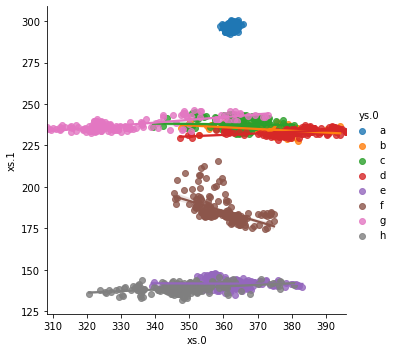

In [27]:
sns.lmplot( x="xs.0", y="xs.1", data=df, hue='ys.0')


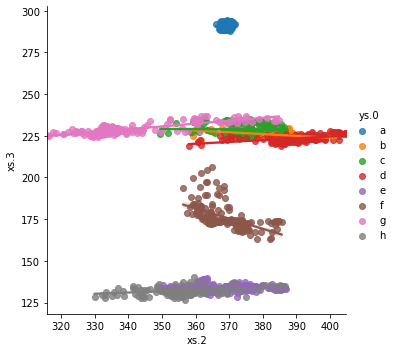

In [28]:
sns.lmplot( x="xs.2", y="xs.3", data=df, hue='ys.0')


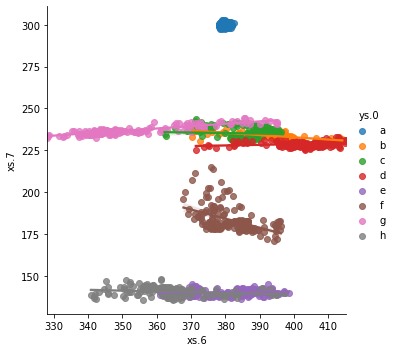

In [29]:
sns.lmplot( x="xs.6", y="xs.7", data=df, hue='ys.0')


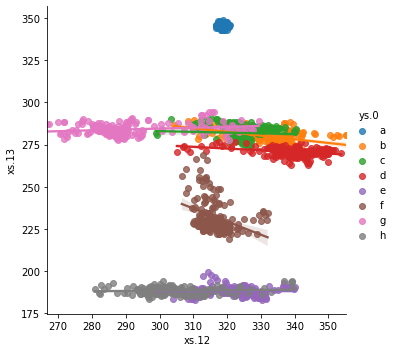

In [30]:
sns.lmplot( x="xs.12", y="xs.13", data=df, hue='ys.0')


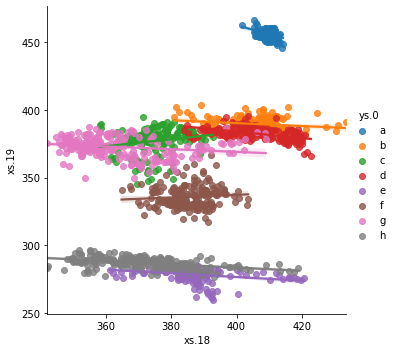

In [34]:
sns.lmplot( x="xs.18", y="xs.19", data=df, hue='ys.0')


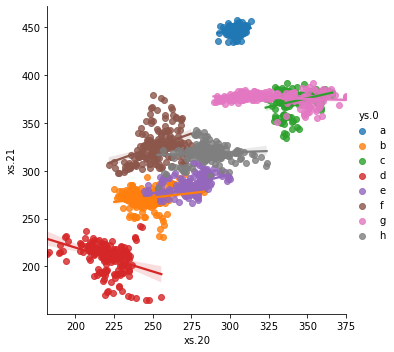

In [31]:
sns.lmplot( x="xs.20", y="xs.21", data=df, hue='ys.0')


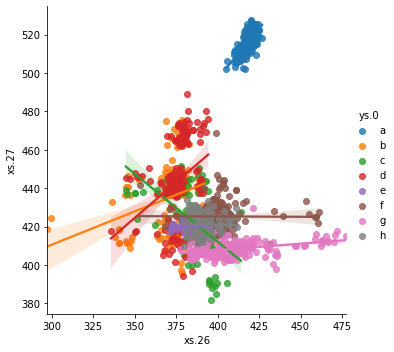

In [32]:
sns.lmplot( x="xs.26", y="xs.27", data=df, hue='ys.0')


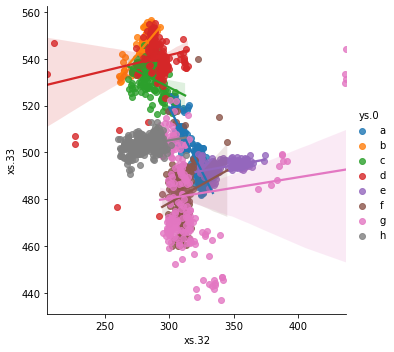

In [33]:
sns.lmplot( x="xs.32", y="xs.33", data=df, hue='ys.0')


When looking at the data as a scatter plot of a sample of the x and y values you can see groupings of points

In [8]:
X = df.drop(columns='ys.0')
y = df['ys.0']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)


In [12]:
knn.fit(X_train_sc, y_train);

In [13]:

knn.score(X_train_sc, y_train)

1.0

In [14]:

knn.score(X_test_sc, y_test)

0.9951690821256038

Just running the basline shows that the data is easy to classify

# Conclusion

Much of the work was done in a program call p5 and used javascript.  The model used was the ml5 neural network. documentation for it can be found here https://learn.ml5js.org/docs/#/reference/neural-network.  The training data was taken from my demonstration of the iaido kata and was used to classify the poses that could then be run by a student. The model was set to create 8 classified poses based on important points in the kata.  I had to use a series of different models to try and get a good working model.

Certain limitations of the model that I ran into include:
 - I was only using a built in webcam for my laptop so the mediocre image quality probably made the poseNet have trouble with pinpointing the points on the body
 - The clothing that is worn during iaido includes a hakama which is a long and loose pair of pants so it made it hard for the computer to detect the legs
 - some of the points in the kata are very close to each other and caused problems with classifying what were nearly similar poses
 - With some of the early models I tried to move around to get a range of locations for the x and y points but that caused problems because some of the poses were so close that the overlap caused the model to have problems
 - position in front of the camera was very important to replicating the pose as it relates to the x and y position
 
The model was able to classify the 8 poses well. The initial model was trained using my data and tested using the data from a student at my dojo.  The choice of test subect was based on the fact that he had a very different body shape to show the efficacy of the model using other data.  With the hakama the model was able to classify 7 of the 8 poses using a little work. Without the hakama the model classified all 8 poses with onlt some trouble. 

With more work the model could potentially be used beyond just iaido like other martial arts or even yoga to help people make sure they find the correct pose based on posture and position and allow for a sort of supervised training even without a trainer.

# Resources

https://www.analyticsvidhya.com/blog/2019/06/build-machine-learning-model-in-your-browser-tensorflow-js-deeplearn-js/

info on tensorflow and poseNet and how to use them in a browser 

https://www.youtube.com/watch?v=FYgYyq-xqAw

part of a video series by The Coding Train that goes over the tensorflow poseNet and using a classifier with it

https://medium.com/tensorflow/real-time-human-pose-estimation-in-the-browser-with-tensorflow-js-7dd0bc881cd5

information on poseNet and Tensorflow.js

# Future Work

Creating a better display for the classifier that shows current step of the kata, next step, and if it is complete

Figuring out a way to make the model more robust so that it can detect even with a hakama

Adding more kata or other things to the classifier to expand the usage